# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

- Create basic visializations using Python libraries
- Understand the data and its features

## Inputs

- Dataset: `cardio_data_with_diabetes_risk_clean.csv`

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/raihannasir/Documents/DA_AI/diabetes_risk/diabetes_risk/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/raihannasir/Documents/DA_AI/diabetes_risk/diabetes_risk'

---

# Section 2

Section 2 content

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
path = 'dataset/cleaned/cardio_data_with_diabetes_risk_clean.csv'
df = pd.read_csv(path)
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,...,age_group,bmi_category,age_simp_group,bmi_simp_cat,diab_risk_percent,diab_risk_cat,age_group_num,bmi_category_num,bp_category_num,diab_risk_cat_num
0,2,168,4.127134,110,80,1,1,0,0,1,...,50-59,Normal,Middle-aged,Low BMI,16.15,Low Risk,3,1,2,0
1,1,156,4.442651,140,90,3,1,0,0,1,...,50-59,Obese I,Middle-aged,Mid BMI,57.50,High Risk,3,3,3,2
2,1,165,4.158883,130,70,3,1,0,0,0,...,50-59,Normal,Middle-aged,Low BMI,18.21,Low Risk,3,1,2,0
3,2,169,4.406719,150,100,1,1,0,0,1,...,40-49,Overweight,Middle-aged,Mid BMI,19.62,Low Risk,2,2,3,0
4,1,156,4.025352,100,60,1,1,0,0,0,...,40-49,Normal,Middle-aged,Low BMI,9.76,Low Risk,2,1,0,0


## General visualization of some categorical features (those are in binary format) and how they relate to the target variable (diabetes risk)

- I am using `diab_risk_cat` as the target target variable, which is a simplified version of the original `diab_risk_percent` column in order to make the visualization easier to interpret

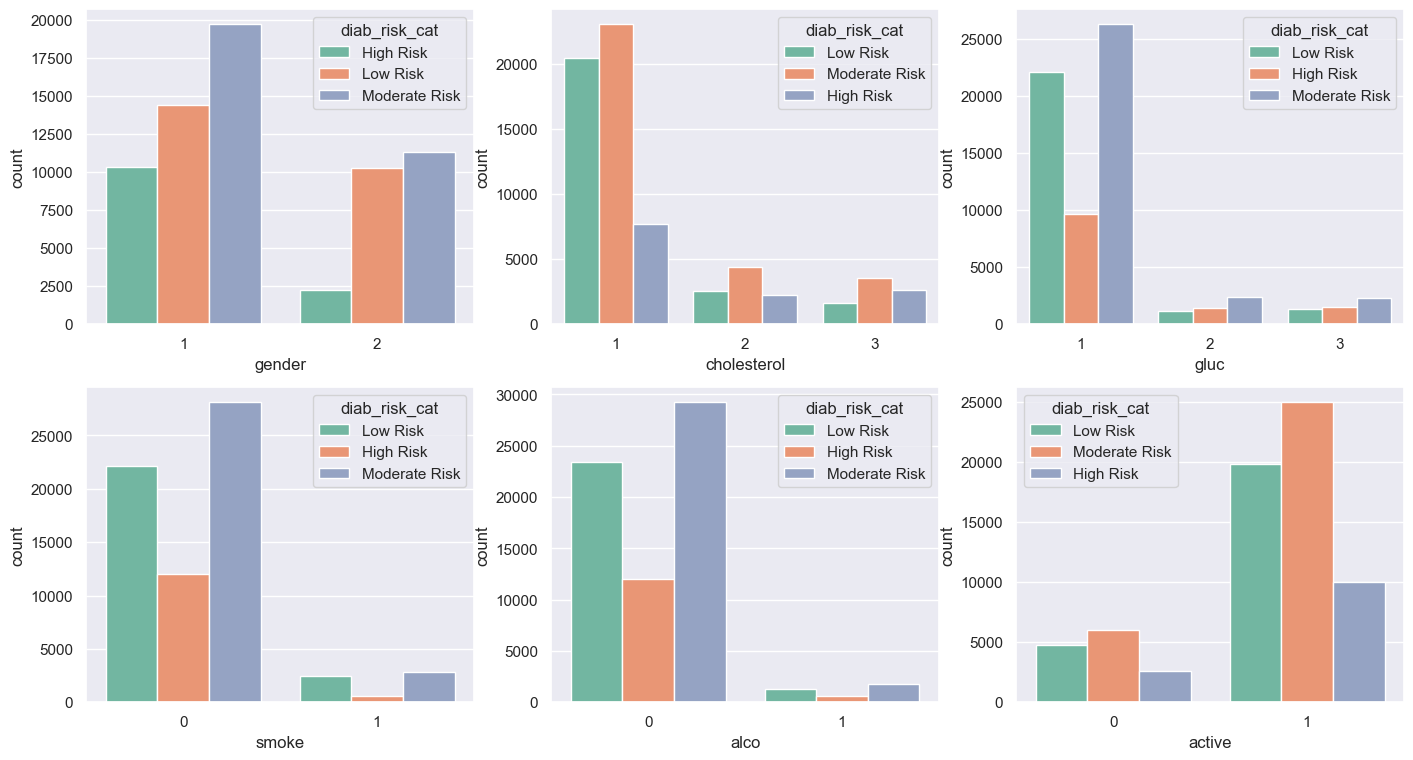

In [21]:
# Visualizing the categorical variables in the dataset
sns.set_theme(palette="Set2")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,9))
sns.countplot(data=df, x='gender', hue='diab_risk_cat', ax=axes[0,0])
sns.countplot(data=df, x='cholesterol', hue='diab_risk_cat',ax=axes[0,1])
sns.countplot(data=df, x='gluc', hue='diab_risk_cat', ax=axes[0,2])
sns.countplot(data=df, x='smoke', hue='diab_risk_cat', ax=axes[1,0])
sns.countplot(data=df, x='alco', hue='diab_risk_cat', ax=axes[1,1])
sns.countplot(data=df, x='active', hue='diab_risk_cat', ax=axes[1,2])
plt.show()

My primary focus here to see how the plot looks like for `gender` and `active` features against the target variable `diab_risk_cat`.

As I can see, the `gender` feature has a significant impact on the target variable, with a higher percentage of `Female` patients in the high-risk category compared to `Male` patients. This suggests that gender may play a role in diabetes risk. So, I will use the Pie Chart to visualize the data distribution of `gender` in the dataset.

From the `active` feature, I can see that there is a significant difference in the percentage of patients who are active and those who are not. This suggests that physical activity may have an impact on diabetes risk. So, I will use the Pie Chart to visualize the data distribution of `active` in the dataset.

**I will use Plotly Pie chart to visualize the data distribution of `gender` and `active` columns in the dataset.**

**Gender column:**

    - `1`: Female
    - `2`: Male

**Active column:**

    - `0`: Not physically active
    - `1`: Physically active

In [15]:
for i in ['gender', 'active']:
    fig = px.pie(df, values=df[i].value_counts(normalize=True), 
                 names=df[i].value_counts().index,
                 color_discrete_sequence=px.colors.sequential.Aggrnyl,
                 title=f'Distribution of {i} in the dataset')
    fig.show()

As we can see from the pie chart, the dataset has a higher percentage of `Female` patients compared to `Male` patients. Additionally, there is a significant portion of the population that is `Physically active` compared to those who are `Not physically active`.

Gender improportion is 1:2, which means there are twice as many `Male` patients as there are `Female` patients. From the general correlation analysis, I see that there is a ***-0.184671*** correlation between `gender` and `diabetes_risk_percentage`, indicating that as the percentage of `Male` patients increases, the diabetes risk percentage tends to decrease slightly. During the hypothesis testing, I will check the `p-value` if null hypothesis is True.

Regarding the `active` column, it can be easily identified that the proportion of physically active patients are almost 4 times higher than those who are not physically active. This is a significant difference. I see from the general correlation analysis that there is a ***-0.014880*** correlation between `active` and `diabetes_risk_percentage`, indicating that there is a very weak negative correlation between physical activity and diabetes risk percentage. This suggests that being physically active does not have a significant impact on reducing diabetes risk in this dataset. However, this seems strange, as physical activity is generally known to reduce the risk of diabetes. Therefore, I will perform a `AB Test` to confirm this finding. Additionally, I will further investigate this relationship during the hypothesis testing phase to see if null hypothesis is True or not.